TODO
- Get min community place
- Get max/min hourly and plot
- Find a better theme
- Graph smoothening for distribution - using binwidth

In [6]:
#OD for oriel data
OD <- read.csv("oriel2526.csv")
library(dplyr)
library(ggplot2)


Warning message in file(filename, "r", encoding = encoding):
“cannot open file '/Users/kwjo/ggplot_theme_Publication-2.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
OD <- as.data.frame(OD) 

names(OD)[names(OD) == "Salary...."] <- "Salary"
names(OD)[names(OD) == "Skilled.worker.visa"] <- "Visa"
names(OD)[names(OD) == "Hours.per.Week"] <- "Working.hours"
names(OD)[names(OD) == "Practice.Placement.Rotation.Setting.1"] <- "Rotation1"
names(OD)[names(OD) == "Length.of.Placement.Rotation.1..weeks."] <- "Rotation1.duration"
names(OD)[names(OD) == "Practice.Placement.Rotation.Setting.2"] <- "Rotation2"
names(OD)[names(OD) == "Length.of.Placement.Rotation.2..weeks."] <- "Rotation2.duration"
names(OD)[names(OD) == "Practice.Placement.Rotation.Setting.3"] <- "Rotation3"
names(OD)[names(OD) == "Length.of.Placement.Rotation.3..weeks."] <- "Rotation3.duration"
names(OD)[names(OD) == "Practice.Placement.Rotation.Setting.4"] <- "Rotation4"
names(OD)[names(OD) == "Length.of.Placement.Rotation.4..weeks."] <- "Rotation4.duration"

colnames(OD)
dim(OD)  

#Classify the type of training
OD$Training.type <- ifelse(OD$Rotation1.duration >= OD$Rotation2.duration + 13, "Non-split", 
                                      ifelse(OD$Rotation1.duration == OD$Rotation2.duration, "Split", "Other"))


[1] "Programme.SystemID"                      
 [2] "Recruitment.Office"                      
 [3] "Region"                                  
 [4] "Sub.Region"                              
 [5] "Sector"                                  
 [6] "Post.Type"                               
 [7] "Programme.Preference"                    
 [8] "Abbreviation"                            
 [9] "Programme.Title"                         
[10] "Programme.Description"                   
[11] "Places.Available"                        
[12] "Start.Date"                              
[13] "Employer.Type"                           
[14] "Employer.Name"                           
[15] "Size.of.organisation..Primary.care.only."
[16] "Specialties..Hospital.only."             
[17] "Visa"                                    
[18] "Number.of.Licences"                      
[19] "Salary"                                  
[20] "Training.Provider"                       
[21] "Employer.website"                        
[22] "Working.hours"                           
[23] "ProgrammeNumber"                         
[24] "ProgrammeName"                           
[25] "ICB.Name"                                
[26] "Pharmacy.Programme.Number"               
[27] "Number.of.Placements.Rotations"          
[28] "Rotation1"                               
[29] "Rotation1.duration"                      
[30] "Rotation2"                               
[31] "Rotation2.duration"                      
[32] "Rotation3"                               
[33] "Rotation3.duration"                      
[34] "Rotation4"                               
[35] "Rotation4.duration"                      
[36] "Placement.Rotation.1..SystemID"          
[37] "Placement.Rotation.2..SystemID"          
[38] "Placement.Rotation.3..SystemID"          
[39] "Placement.Rotation.4..SystemID"

[1] 3923   39

In [3]:
keeps <- c("Training.type","Employer.Type", "Region", "Sector", "Programme.Title", "Visa", "Salary", "Places.Available", "Working.hours",
           "Rotation1", "Rotation1.duration", "Rotation2", "Rotation2.duration", "Rotation3", "Rotation3.duration", "Rotation4", "Rotation4.duration")
           
OD <- OD[keeps]
colnames(OD)
OD$Hourly.Wage <- OD$Salary/52/OD$Working.hours
OD$Visa <- as.factor(OD$Visa)

[1] "Training.type"      "Employer.Type"      "Region"            
 [4] "Sector"             "Programme.Title"    "Visa"              
 [7] "Salary"             "Places.Available"   "Working.hours"     
[10] "Rotation1"          "Rotation1.duration" "Rotation2"         
[13] "Rotation2.duration" "Rotation3"          "Rotation3.duration"
[16] "Rotation4"          "Rotation4.duration"

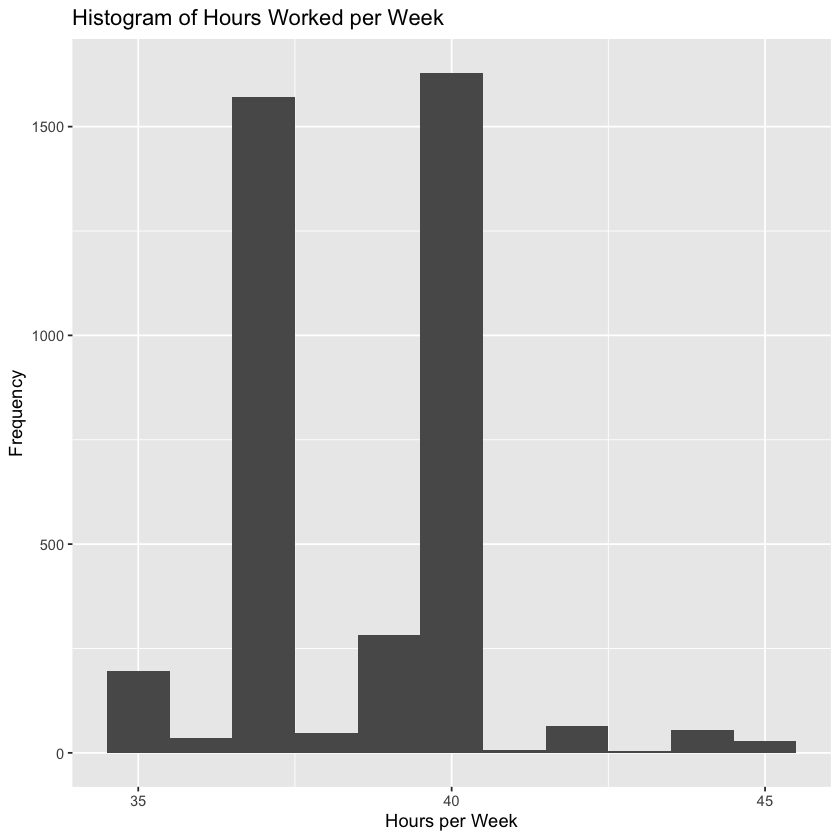

In [4]:
library(ggplot2)

# Define the plot for Hours Worked per Week
hours.worked.plot <- ggplot(OD, aes(x = Working.hours)) + 
  geom_histogram(binwidth = 1) + 
  ggtitle("Histogram of Hours Worked per Week") + 
  xlab("Hours per Week") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(0, max(OD$Working.hours, na.rm = TRUE), by = 5))

# Display the plot
hours.worked.plot


[1] 100

[1] 25000 26000 24000 23795 27500 22000 20825 22308 24985 25795 22605 28000
 [13] 23850 28407 23500 24500 26500 24999 27000 23800 20821 26770 22011 21000
 [25] 24100 32000 23000 22500 25283 26175 25580 32720 34089 27839 30000 23650
 [37] 23465 25800 23200 28500 24812 26963 27471 25500 26513 27040 24300 24250
 [49] 29000 21416 22750 34098 26704 24200 28400 24390 26200 24336 29544 27203
 [61] 26203 25357 23400 24900 29500 25282 22350 25400 22400 25650 26800 23300
 [73] 25750 24344 26520 25480 22369 24375 20900 21500 29250 29828 22380 22905
 [85] 23750 23796 24960 26703 24095 24308 21118 31200 29827 27900 24950 25358
 [97] 27204 23250 22650 25350

ERROR: Error in theme_Publication(): could not find function "theme_Publication"


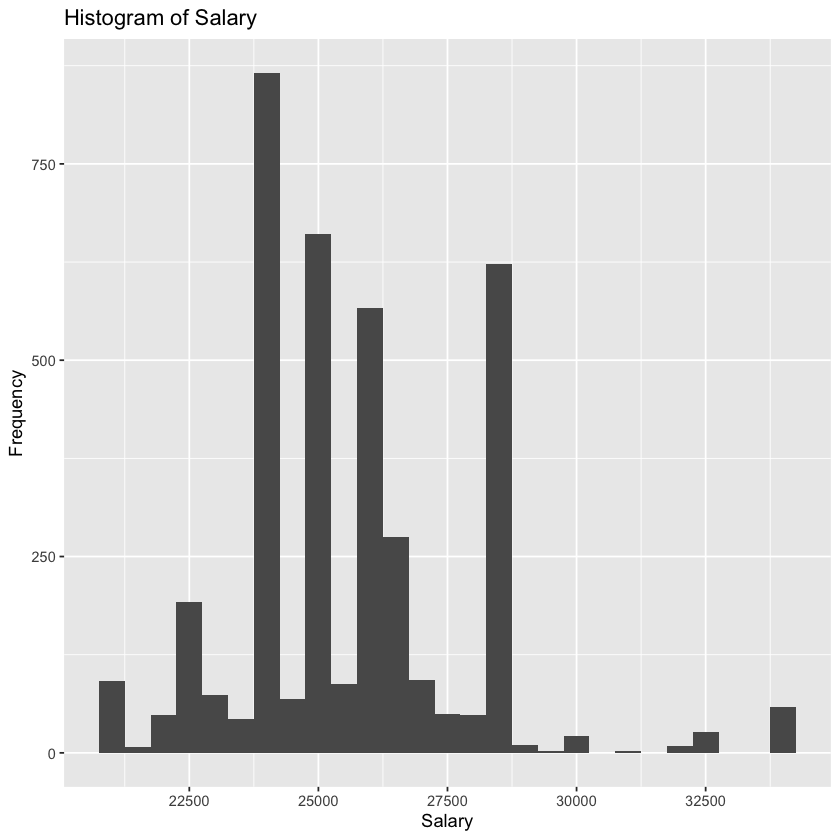

In [5]:
# Define the plot for Salary with meaningful intervals
salary.plot <- ggplot(OD, aes(x = Salary)) + 
  geom_histogram(binwidth = 500) + 
  ggtitle("Histogram of Salary") + 
  xlab("Salary") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(20000, max(OD$Salary, na.rm = TRUE), by = 2500))

# Display the plot
salary.plot

length(unique(OD$Salary))
unique(OD$Salary)

# Define the plot for Salary with meaningful intervals
salary.plot <- ggplot(OD, aes(x = Salary)) + 
  geom_histogram(binwidth = 1500) + 
  ggtitle("Histogram of Salary") + 
  xlab("Salary") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(20000, max(OD$Salary, na.rm = TRUE), by = 2500)) +
  theme_Publication()

salary.plot



In [ ]:
community.pharmacy.average.salary <- mean(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
community.pharmacy.average.salary
community.min.salary <- min(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
community.max.salary <- max(OD$Salary[OD$Employer.Type == "Primary Care"], na.rm = TRUE)
paste0("The average salary for community pharmacy is ", community.pharmacy.average.salary, " with a minimum of ", community.min.salary, " and a maximum of ", community.max.salary)

hospital.pharmacy.average.salary <- mean(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
hospital.pharmacy.average.salary
hospital.min.salary <- min(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
hospital.max.salary <- max(OD$Salary[OD$Employer.Type == "Hospital"], na.rm = TRUE)
paste0("The average salary for hospital pharmacy is ", hospital.pharmacy.average.salary, " with a minimum of ", hospital.min.salary, " and a maximum of ", hospital.max.salary)

[1] 24929.77

[1] "The average salary for community pharmacy is 24929.7673853629 with a minimum of 20821 and a maximum of 32000"

[1] 29033.3

[1] "The average salary for hospital pharmacy is 29033.3015873016 with a minimum of 25357 and a maximum of 34098"

In [ ]:
num_hosp <- filter(OD, Employer.Type == "Hospital") %>% nrow()  
num_hosp

soreted_salary <- OD[order(-OD$Salary),]
# head(soreted_salary)

# 34098 might be a wrong salary

OD <- OD %>% mutate(Salary = ifelse(Salary == 34098,34089,Salary))
soreted_salary[70,]
soreted_salary[80,]

#https://faq.nhsbsa.nhs.uk/knowledgebase/article/KA-23439/en-us
#https://www.healthcareers.nhs.uk/working-health/working-nhs/nhs-pay-and-benefits/agenda-change-pay-rates
band5_salary <-28407
band5_salary_with_london_weighting_inner <- band5_salary*1.2
band5_salary_with_london_weighting_inner
band5_salary_with_london_weighting_outer <- band5_salary*1.15
band5_salary_with_london_weighting_outer
band5_salary_with_london_weighting_fringe <- band5_salary*1.05
band5_salary_with_london_weighting_fringe


num_hosp_with_london_weighting <- filter(OD, Employer.Type == "Hospital" & Salary == 34089) %>% nrow()  
num_hosp_with_london_weighting
# This is not the total number of places available in hospitals, but the number of programmes with London weighting

num_places_available_with_london_weighting20 <- sum(OD$Places.Available[OD$Employer.Type == "Hospital" & OD$Salary == 34089], na.rm = TRUE)
num_places_available_with_london_weighting20

num_places_available_with_london_weighting15 <- sum(OD$Places.Available[OD$Employer.Type == "Hospital" & OD$Salary == 34089], na.rm = TRUE)
num_places_available_with_london_weighting15

num_places_available_with_london_weighting5 <- sum(OD$Places.Available[OD$Employer.Type == "Hospital" & OD$Salary == 34089], na.rm = TRUE)
num_places_available_with_london_weighting5

soreted_salary[58:100,]

[1] 630

,Training.type,Employer.Type,Region,Sector,Programme.Title,Visa,Salary,Places.Available,Working.hours,Rotation1,Rotation1.duration,Rotation2,Rotation2.duration,Rotation3,Rotation3.duration,Rotation4,Rotation4.duration,Hourly.Wage
,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<dbl>
2106,Non-split,Hospital,London,South West London (Pharmacy),Kingston Hospital NHSFT + Kirkby Chemist/Kingston-upon-Thames + Sutton/KT2 7QB + SM2 6BX,Y,32720,1,37.5,Hospital,39,Community,13,,NA,,NA,16.77949


,Training.type,Employer.Type,Region,Sector,Programme.Title,Visa,Salary,Places.Available,Working.hours,Rotation1,Rotation1.duration,Rotation2,Rotation2.duration,Rotation3,Rotation3.duration,Rotation4,Rotation4.duration,Hourly.Wage
,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<dbl>
3057,Split,Hospital,London,North Central London,Royal Free London NHSFT - Barnet Hospital + Longrove Medical Centre/EN5 3DJ + EN5 2ED,Y,32720,1,37.5,Hospital,26,General Practice,26,,NA,,NA,16.77949


[1] 34088.4

[1] 32668.05

[1] 29827.35

[1] 58

[1] 106

[1] 106

[1] 106

,Training.type,Employer.Type,Region,Sector,Programme.Title,Visa,Salary,Places.Available,Working.hours,Rotation1,Rotation1.duration,Rotation2,Rotation2.duration,Rotation3,Rotation3.duration,Rotation4,Rotation4.duration,Hourly.Wage
,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<dbl>
3808,Non-split,Hospital,London,North Central London,Whittington Health + Islington GP Federation/North Central London/N19 5NF + N7 8EG,Y,34089,2,37.5,Hospital,39,General Practice,13,,NA,,NA,17.48154
349,Non-split,Hospital,London,North East London (Pharmacy),"Barking, Havering & Redbridge University Hosp NHS Trust+Boots(Romford)/London/RM7+IG3+RM11",Y,32720,1,37.5,Hospital,39,Community,13,,NA,,NA,16.77949
350,Non-split,Hospital,London,North East London (Pharmacy),"Barking, Havering & Redbridge University Hosp NHS Trust+Mastaa-Care Pcy/London/RM7+IG3+RM8",Y,32720,1,37.5,Hospital,39,Community,13,,NA,,NA,16.77949
351,NA,Hospital,London,North East London (Pharmacy),"Barking, Havering & Redbridge University Hospitals NHST/Romford/RM7 0AG/Ilford/IG3 8YB",Y,32720,2,37.5,Hospital,52,,NA,,NA,,NA,16.77949
355,Non-split,Hospital,London,North Central London,Barnet Enfield&Haringey MH Trust+North Middx Hosp+Safedale Pcy/London/N153TH+N181QX+N211RA,Y,32720,2,37.5,Hospital,26,Hospital,13,Community,13,,NA,16.77949
857,Non-split,Hospital,London,North West London (Pharmacy),Chelsea & Westminster Hospital-West Middlesex site + Hounslow PCN/Isleworth/TW76AF+TW33EB,N,32720,4,37.5,Hospital,39,General Practice,13,,NA,,NA,16.77949
1203,NA,Hospital,London,South West London (Pharmacy),Croydon Health Services NHS Trust/Croydon/CR7 7YE,Y,32720,4,37.5,Hospital,52,,NA,,NA,,NA,16.77949
1533,NA,Hospital,London,South West London (Pharmacy),Epsom & St Helier University Hospitals NHS Trust/Epsom + Carshalton/KTI8 7EG + SM5 1AA,Y,32720,4,37.5,Hospital,52,,NA,,NA,,NA,16.77949
1534,Split,Hospital,London,South West London (Pharmacy),Epsom and St Helier Hospitals+S G Barai Pharmacy/Epsom+Sutton/KT18 7EG+SM5 1AA+SM1 3AT,Y,32720,1,37.5,Hospital,26,Community,26,,NA,,NA,16.77949


In [ ]:
result <- OD %>%
    filter(Salary == 34098) 
result

Training.type,Employer.Type,Region,Sector,Programme.Title,Visa,Salary,Places.Available,Working.hours,Rotation1,Rotation1.duration,Rotation2,Rotation2.duration,Rotation3,Rotation3.duration,Rotation4,Rotation4.duration,Hourly.Wage
<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<dbl>
Non-split,Hospital,London,North West London (Pharmacy),CNWL NHS Fdn Trust (St. Charles Hosp)+Boots (Notting Hill Gate)/London/W10 6DZ+W11 3QA,N,34098,1,37.5,Hospital,39,Community,13,,NA,,NA,17.48615
